In [1]:
import keras_nlp as kn
import tensorflow as tf
import pandas as pd
import random

from tensorflow import keras
# from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

from utils import data_utils, parameters as params

Using TensorFlow backend


2023-09-02 00:18:21.255957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-02 00:18:22.356906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Creating and Loading Dataset

In [2]:
# Create dataset from individual files
# data_utils.create_dataset('./data/en-kn/train.en', './data/en-kn/train.kn', 450000, './data/en-kn')

In [3]:
# Split the data into training, validation and test sets
# data_utils.split_data('./data/en-kn/data.tsv', output_dir='./data/en-kn/', val_size=0.2, test_size=0.33)

In [4]:
train_pairs = pd.read_csv('./data/en-kn/train.tsv', sep='\t', header=None).values.tolist()
train_pairs[0:5]

[['Headaches and migraines', 'ತಲೆನೋವು ಮತ್ತು ಮೈಗ್ರೇನ್ ಲಕ್ಷಣಗಳು'],
 ['Jakhni PO Baraon PS', 'ಜಖನಿ ಪಿಒ ಬಾರನ್ ಪಿಎಸ್'],
 ['He said that it was very difficult to do that.',
  'ಇದು ತೀರಾ ಕಷ್ಟಸಾಧ್ಯ ಎಂದು ಹೇಳಿದರು.'],
 ['Two rounds remain.', 'ಉಳಿದಿದ್ದು ಎರಡೇ ವಿಕೆಟ್\u200c.'],
 ['Double edge', 'ಅವಳಿ ತಿರುಪು.']]

In [5]:
len(train_pairs)

360000

In [6]:
val_pairs = pd.read_csv('./data/en-kn/val.tsv', sep='\t', header=None).values.tolist()
len(val_pairs)

60300

### Creating vocabulary and tokenizing

In [7]:
reserved_tokens = ["[PAD]", "[UNK]", "[START]", "[END]"]

eng_samples = [pair[0] for pair in train_pairs]
# data_utils.compute_vocabulary(eng_samples, params.ENG_VOCAB_SIZE, reserved_tokens=reserved_tokens, vocab_file_path='./utils/en-kn/eng_vocab.txt')

In [8]:
kan_samples = [pair[1] for pair in train_pairs]
# data_utils.compute_vocabulary(kan_samples, params.KAN_VOCAB_SIZE, reserved_tokens=reserved_tokens, vocab_file_path='./utils/en-kn/kan_vocab.txt')

In [9]:
with open('./utils/en-kn/eng_vocab.txt', 'r') as f, open('./utils/en-kn/kan_vocab.txt', 'r') as g:
    eng_vocab = f.read().splitlines()
    kan_vocab = g.read().splitlines()

In [10]:
print("English vocab size: ", len(eng_vocab))
print("Kannada vocab size: ", len(kan_vocab))

English vocab size:  14617
Kannada vocab size:  14900


In [11]:
print("English vocab sample: ", eng_vocab[350:360])
print("Kannada vocab sample: ", kan_vocab[350:360])

English vocab sample:  ['Mumbai', 'When', 'off', 'wife', 'matter', 'Pradesh', '##es', 'spot', 'last', 'movie']
Kannada vocab sample:  ['ೃ', 'ೄ', 'ೆ', 'ೇ', 'ೈ', 'ೊ', 'ೋ', 'ೌ', '್', 'ೕ']


In [12]:
# Define the tokenizer
eng_tokenizer = kn.tokenizers.WordPieceTokenizer(vocabulary=eng_vocab, lowercase=False)
kan_tokenizer = kn.tokenizers.WordPieceTokenizer(vocabulary=kan_vocab, lowercase=False)

2023-09-02 00:18:27.153322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 00:18:27.301030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 00:18:27.301320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 00:18:27.302742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-02 00:18:27.303040: I tensorflow/compile

In [13]:
# Testing the tokenizer
eng_tokens = eng_tokenizer.tokenize(eng_samples[5])
print("English input: ", eng_samples[5])
print("English tokens: ", eng_tokens)
print("Reconstructed English input: ", eng_tokenizer.detokenize(eng_tokens))

print()

kan_tokens = kan_tokenizer.tokenize(kan_samples[5])
print("Kannada input: ", kan_samples[5])
print("Kannada tokens: ", kan_tokens)
print("Reconstructed Kannada input: ", kan_tokenizer.detokenize(kan_tokens))

English input:  The film stars Shanvi Srivastav as the female lead.
English tokens:  tf.Tensor(
[  103   173  1013 12732   685  7342  1158  1586   126    97  2097   554
    17], shape=(13,), dtype=int32)
Reconstructed English input:  tf.Tensor(b'The film stars Shanvi Srivastav as the female lead .', shape=(), dtype=string)

Kannada input:  ಉಳಿದಂತೆ ಶಾನ್ವಿ ಶ್ರೀವಾತ್ಸವ್ ನಾಯಕಿಯಾಗಿದ್ದಾರೆ.
Kannada tokens:  tf.Tensor([5067 1019  561 1079  753 1249 8467  534 4604  660   17], shape=(11,), dtype=int32)
Reconstructed Kannada input:  tf.Tensor(b'\xe0\xb2\x89\xe0\xb2\xb3\xe0\xb2\xbf\xe0\xb2\xa6\xe0\xb2\x82\xe0\xb2\xa4\xe0\xb3\x86 \xe0\xb2\xb6\xe0\xb2\xbe\xe0\xb2\xa8\xe0\xb3\x8d\xe0\xb2\xb5\xe0\xb2\xbf \xe0\xb2\xb6\xe0\xb3\x8d\xe0\xb2\xb0\xe0\xb3\x80\xe0\xb2\xb5\xe0\xb2\xbe\xe0\xb2\xa4\xe0\xb3\x8d\xe0\xb2\xb8\xe0\xb2\xb5\xe0\xb3\x8d \xe0\xb2\xa8\xe0\xb2\xbe\xe0\xb2\xaf\xe0\xb2\x95\xe0\xb2\xbf\xe0\xb2\xaf\xe0\xb2\xbe\xe0\xb2\x97\xe0\xb2\xbf\xe0\xb2\xa6\xe0\xb3\x8d\xe0\xb2\xa6\xe0\xb2\xbe\xe0\xb2\xb0\x

In [14]:
test = kan_tokenizer.detokenize(kan_tokens).numpy().decode('utf-8') # type: ignore
test

'ಉಳಿದಂತೆ ಶಾನ್ವಿ ಶ್ರೀವಾತ್ಸವ್ ನಾಯಕಿಯಾಗಿದ್ದಾರೆ .'

### Formatting Datasets

In [15]:
train_ds = data_utils.make_dataset(train_pairs, params.BATCH_SIZE, eng_tokenizer, kan_tokenizer, params.MAX_SEQ_LEN)
val_ds = data_utils.make_dataset(val_pairs, params.BATCH_SIZE, eng_tokenizer, kan_tokenizer, params.MAX_SEQ_LEN)

In [16]:
for inputs, targets in train_ds.take(1):
    print(f"inputs['encoder_inputs'].shape: {inputs['encoder_inputs'].shape}")
    print(f"inputs['decoder_inputs'].shape: {inputs['decoder_inputs'].shape}")
    print(f"targets.shape: {targets.shape}")

inputs['encoder_inputs'].shape: (48, 40)
inputs['decoder_inputs'].shape: (48, 40)
targets.shape: (48, 40)


2023-09-02 00:18:34.976628: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Building the model

In [17]:
encoder_inputs = keras.layers.Input(shape=(None,), dtype='int64', name='encoder_inputs')

# Encoder Embedding 
x = kn.layers.TokenAndPositionEmbedding(
    vocabulary_size=params.ENG_VOCAB_SIZE,
    sequence_length=params.MAX_SEQ_LEN,
    embedding_dim=params.EMBEDDING_DIM,
    mask_zero=True,
    name='encoder_embedding'
) (encoder_inputs)

# Encoder Transformer Block
encoder_outputs = kn.layers.TransformerEncoder(intermediate_dim=params.INTERMEDIATE_DIM, num_heads=params.NUM_HEADS, dropout=0.3, name='encoder_transformer_block') (x)
encoder = keras.Model(encoder_inputs, encoder_outputs, name='encoder')

# Decoder
decoder_inputs = keras.layers.Input(shape=(None,), dtype='int64', name='decoder_inputs')
encoded_seq_inputs = keras.layers.Input(shape=(None, params.EMBEDDING_DIM), name='decoder_attention_inputs')

# Decoder Embedding
x = kn.layers.TokenAndPositionEmbedding(
    vocabulary_size=params.KAN_VOCAB_SIZE,
    sequence_length=params.MAX_SEQ_LEN,
    embedding_dim=params.EMBEDDING_DIM,
    mask_zero=True,
    name='decoder_embedding'
) (decoder_inputs)

# Decoder Transformer Block
x = kn.layers.TransformerDecoder(intermediate_dim=params.INTERMEDIATE_DIM, num_heads=params.NUM_HEADS, dropout=0.3, name='decoder_transformer_block') (
    decoder_sequence=x, 
    encoder_sequence=encoded_seq_inputs
)
x = keras.layers.Dropout(0.5, name='decoder_dropout') (x)

# Decoder output
decoder_outputs = keras.layers.Dense(params.KAN_VOCAB_SIZE, activation='softmax', name='decoder_outputs') (x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs, name='decoder')

decoder_outputs = decoder([decoder_inputs, encoder_outputs])

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs, name='transformer')


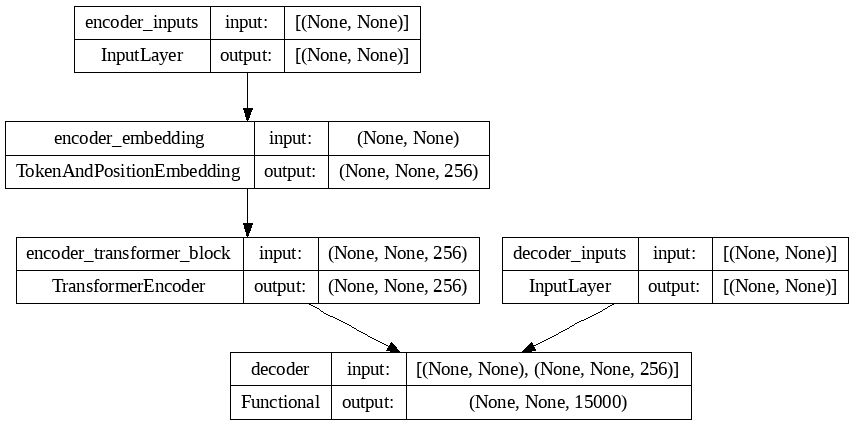

In [18]:
tf.keras.utils.plot_model(transformer, show_shapes=True, dpi=96)

In [19]:
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 encoder_embedding (TokenAn  (None, None, 256)            3850240   ['encoder_inputs[0][0]']      
 dPositionEmbedding)                                                                              
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                      

In [20]:
# transformer.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = transformer.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=params.EPOCHS,
#     callbacks=[
#         # keras.callbacks.ModelCheckpoint('./models/en-kn/transformer_14M_weights.h5', save_best_only=True, save_weights_only=True, verbose=1),
#         keras.callbacks.BackupAndRestore('./models/en-kn/backups'),
#         keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#     ]
# )

In [21]:
transformer = keras.models.load_model('./models/en-kn/model/')
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 encoder_embedding (TokenAn  (None, None, 256)            3850240   ['encoder_inputs[0][0]']      
 dPositionEmbedding)                                                                              
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                      

### Qualitative Analysis

In [22]:
test_pairs = pd.read_csv('./data/en-kn/test.tsv', sep='\t', header=None).values.tolist()
len(test_pairs)

29700

In [23]:
test_eng_samples = [pair[0] for pair in test_pairs]

for i in range(2):
    input_sequence = random.choice(test_eng_samples)
    translated_sequence = data_utils.decode_sequences(tf.constant([input_sequence]), eng_tokenizer, kan_tokenizer, params.MAX_SEQ_LEN, transformer)
    translated_sequence = (
        translated_sequence.replace("[START]", "")
        .replace("[END]", "")
        .replace("[PAD]", "")
        .strip()
    )

    print(f"Input: {input_sequence}")
    print(f"Translated: {translated_sequence}")
    print()

2023-09-02 00:18:42.334763: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x759ab070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-02 00:18:42.334823: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-09-02 00:18:42.603075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-02 00:18:42.795423: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-02 00:18:42.901518: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Input: Can India win the series?
Translated: ಭಾರತ ತಂಡ ಭಾರತ ಗೆಲುವು ಸಾಧಿಸುವುದು ?

Input: These questions intrigued a number of economists.
Translated: ಈ ಪ್ರಶ್ನೆಗಳಿಗೆ ಉತ್ತರ ಅರ್ಥಶಾಸ್ತ್ರಜ್ಞರ ಬಗ್ಗೆ ಕುತೂಹಲ ಮೂಡಿಸಿದೆ .



### Quantitative Analysis

In [24]:
test_ds = data_utils.make_dataset(test_pairs, params.BATCH_SIZE, eng_tokenizer, kan_tokenizer, params.MAX_SEQ_LEN)

In [25]:
transformer.evaluate(test_ds, use_multiprocessing=True, workers=-1)

619/619 [==============================] - 30s 47ms/step - loss: 3.4181 - accuracy: 0.4134


[3.4180784225463867, 0.41343721747398376]

In [27]:
# bleu_score = kn.metrics.Bleu(tokenizer=kan_tokenizer, name='bleu', max_order=3)
# BLEU score comes to around 10

In [28]:
# Takes too long to run
# for pair in test_pairs[10000:15000]:
#     input_sequence = pair[0]
#     reference_sequence = pair[1]

#     translated_sequence = data_utils.decode_sequences(tf.constant([input_sequence]), eng_tokenizer, kan_tokenizer, params.MAX_SEQ_LEN, transformer)
#     translated_sequence = (
#         translated_sequence.replace("[START]", "")
#         .replace("[END]", "")
#         .replace("[PAD]", "")
#         .strip()
#     )

#     bleu_score.update_state([reference_sequence], [translated_sequence])
# print(f"Bleu score: {bleu_score.result().numpy() * 100:.2f}")